# Курсовая работа по дисциплине "Машинное обучение"
Семин Александр, группа М8О-109СВ-24


# Импорт и скачивание датасета

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import kagglehub
pd.set_option('display.max_columns', None)


In [ ]:
# https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand
import kagglehub

directory_path = kagglehub.dataset_download("jessemostipak/hotel-booking-demand")
df = pd.read_csv("/kaggle/input/hotel-booking-demand/hotel_bookings.csv")
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


# Работа с датасетом

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [34]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [37]:
df.describe(include='object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3,926
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2015-10-21
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166,1461


Присвоение индекса

In [36]:
if 'id' not in df.columns:
    df['id'] = range(1, len(df) + 1)
    df.set_index('id', inplace=True)


Проверка пропущенных значений

Количество пропущенных значений по признакам:
children         4
country        488
agent        16340
company     112593
dtype: int64


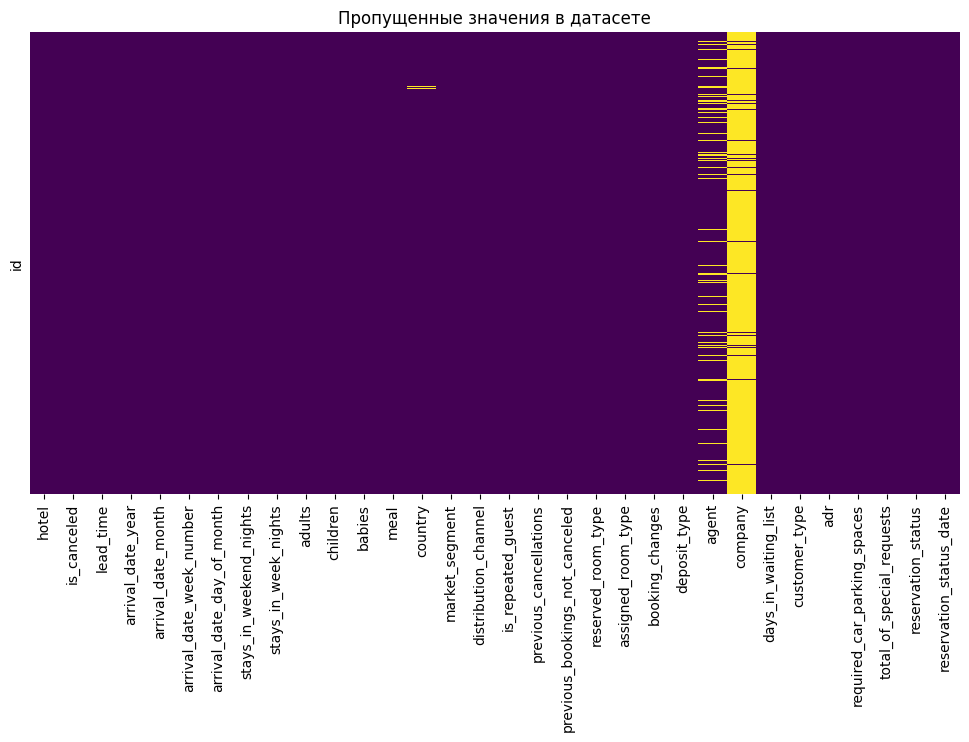

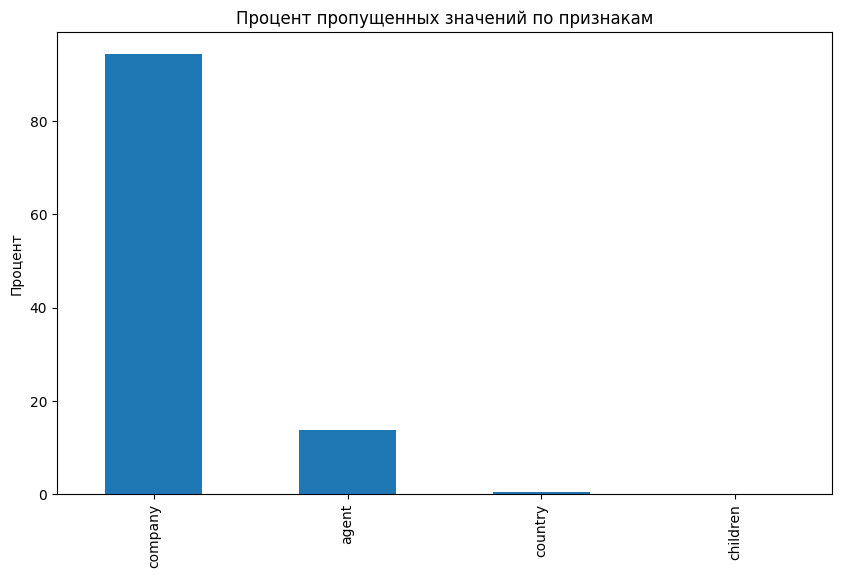

In [38]:
missing_values = df.isna().sum()
print("Количество пропущенных значений по признакам:")
print(missing_values[missing_values > 0])

plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title('Пропущенные значения в датасете')
plt.show()

missing_percentage = (missing_values / len(df)) * 100
missing_percentage = missing_percentage[missing_percentage > 0]

if len(missing_percentage) > 0:
    plt.figure(figsize=(10, 6))
    missing_percentage.sort_values(ascending=False).plot(kind='bar')
    plt.title('Процент пропущенных значений по признакам')
    plt.ylabel('Процент')
    plt.show()


Определение целевой переменной - is_canceled - факт отмены бронирования (1 - отменено, 0 - не отменено)

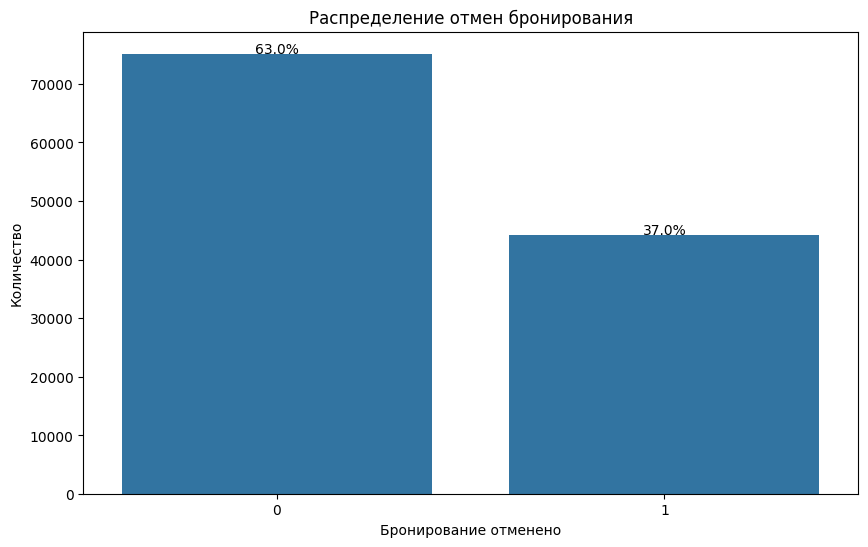

Процент отмененных бронирований: 37.04%
Процент состоявшихся бронирований: 62.96%


In [39]:
target_column = 'is_canceled'

plt.figure(figsize=(10, 6))
sns.countplot(x=target_column, data=df)
plt.title('Распределение отмен бронирования')
plt.xlabel('Бронирование отменено')
plt.ylabel('Количество')

total = len(df)
for i, count in enumerate(df[target_column].value_counts()):
    percentage = count / total * 100
    plt.text(i, count + 100, f"{percentage:.1f}%", ha='center')

plt.show()

print(f"Процент отмененных бронирований: {df[target_column].mean() * 100:.2f}%")
print(f"Процент состоявшихся бронирований: {(1 - df[target_column].mean()) * 100:.2f}%")


Определение типов признаков

In [40]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.drop(target_column)

print(f"Категориальные признаки ({len(categorical_cols)}):")
print(categorical_cols.tolist())
print(f"\nЧисловые признаки ({len(numerical_cols)}):")
print(numerical_cols.tolist())

Категориальные признаки (12):
['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status', 'reservation_status_date']

Числовые признаки (19):
['lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']


Анализ распределения бронирований по типам отелей

<Figure size 1000x600 with 0 Axes>

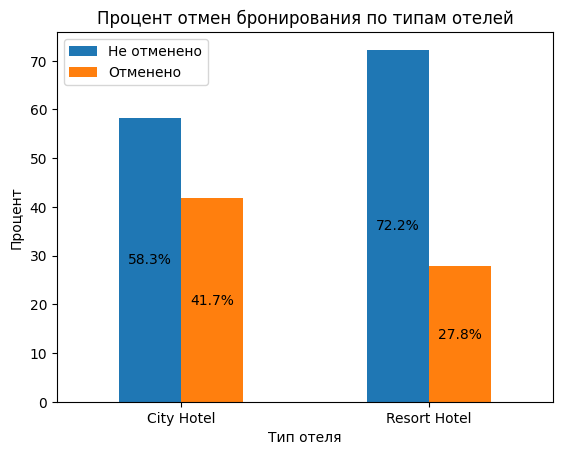

Chi-squared test: chi2 = 2224.9249, p-value = 0.0000
Существует статистически значимая связь между типом отеля и вероятностью отмены бронирования.


In [41]:
plt.figure(figsize=(10, 6))
hotel_canceled = df.groupby(['hotel', target_column]).size().unstack()
hotel_canceled_pct = hotel_canceled.div(hotel_canceled.sum(axis=1), axis=0) * 100

ax = hotel_canceled_pct.plot(kind='bar', stacked=False)
plt.title('Процент отмен бронирования по типам отелей')
plt.xlabel('Тип отеля')
plt.ylabel('Процент')
plt.xticks(rotation=0)
plt.legend(['Не отменено', 'Отменено'])

for i, p in enumerate(ax.patches):
    width, height = p.get_width(), p.get_height()
    x, y = p.get_x(), p.get_y()
    ax.text(x + width/2, y + height/2, f'{height:.1f}%', ha='center', va='center')

plt.show()

from scipy.stats import chi2_contingency
hotel_canceled_table = pd.crosstab(df['hotel'], df[target_column])
chi2, p, dof, expected = chi2_contingency(hotel_canceled_table)
print(f"Chi-squared test: chi2 = {chi2:.4f}, p-value = {p:.4f}")
if p < 0.05:
    print("Существует статистически значимая связь между типом отеля и вероятностью отмены бронирования.")
else:
    print("Нет статистически значимой связи между типом отеля и вероятностью отмены бронирования.")


Анализ влияния времени ожидания (lead_time) на отмену бронирования

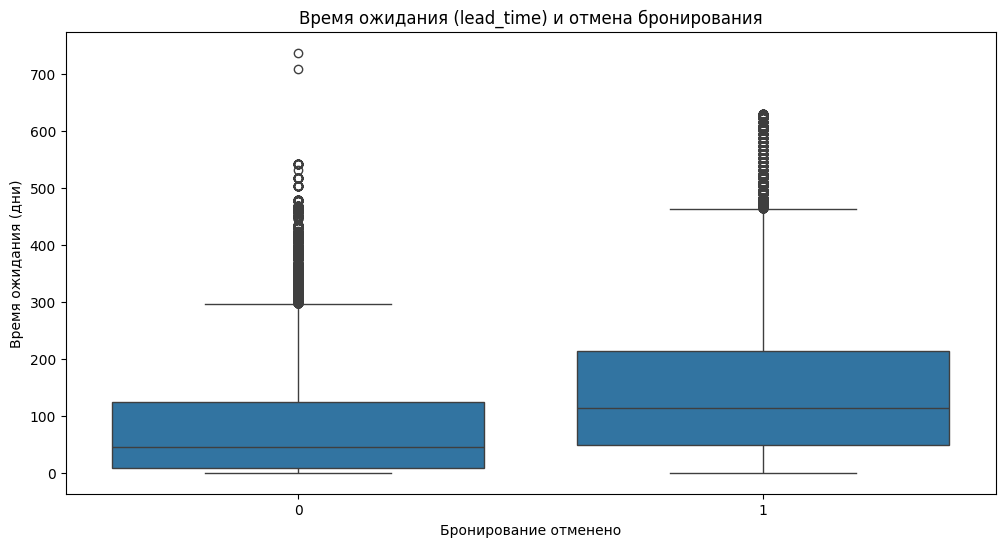

Статистика времени ожидания (lead_time) по группам:
                   mean  median
is_canceled                    
0             79.984687    45.0
1            144.848815   113.0
Mann-Whitney U test: U = 1032954917.5000, p-value = 0.0000
Существует статистически значимая разница во времени ожидания между отмененными и неотмененными бронированиями.


In [42]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=target_column, y='lead_time', data=df)
plt.title('Время ожидания (lead_time) и отмена бронирования')
plt.xlabel('Бронирование отменено')
plt.ylabel('Время ожидания (дни)')
plt.show()

lead_time_stats = df.groupby(target_column)['lead_time'].agg(['mean', 'median'])
print("Статистика времени ожидания (lead_time) по группам:")
print(lead_time_stats)

from scipy.stats import mannwhitneyu
stat, p = mannwhitneyu(df[df[target_column] == 0]['lead_time'],
                       df[df[target_column] == 1]['lead_time'])
print(f"Mann-Whitney U test: U = {stat:.4f}, p-value = {p:.4f}")
if p < 0.05:
    print("Существует статистически значимая разница во времени ожидания между отмененными и неотмененными бронированиями.")
else:
    print("Нет статистически значимой разницы во времени ожидания.")


Анализ сезонности отмен бронирования

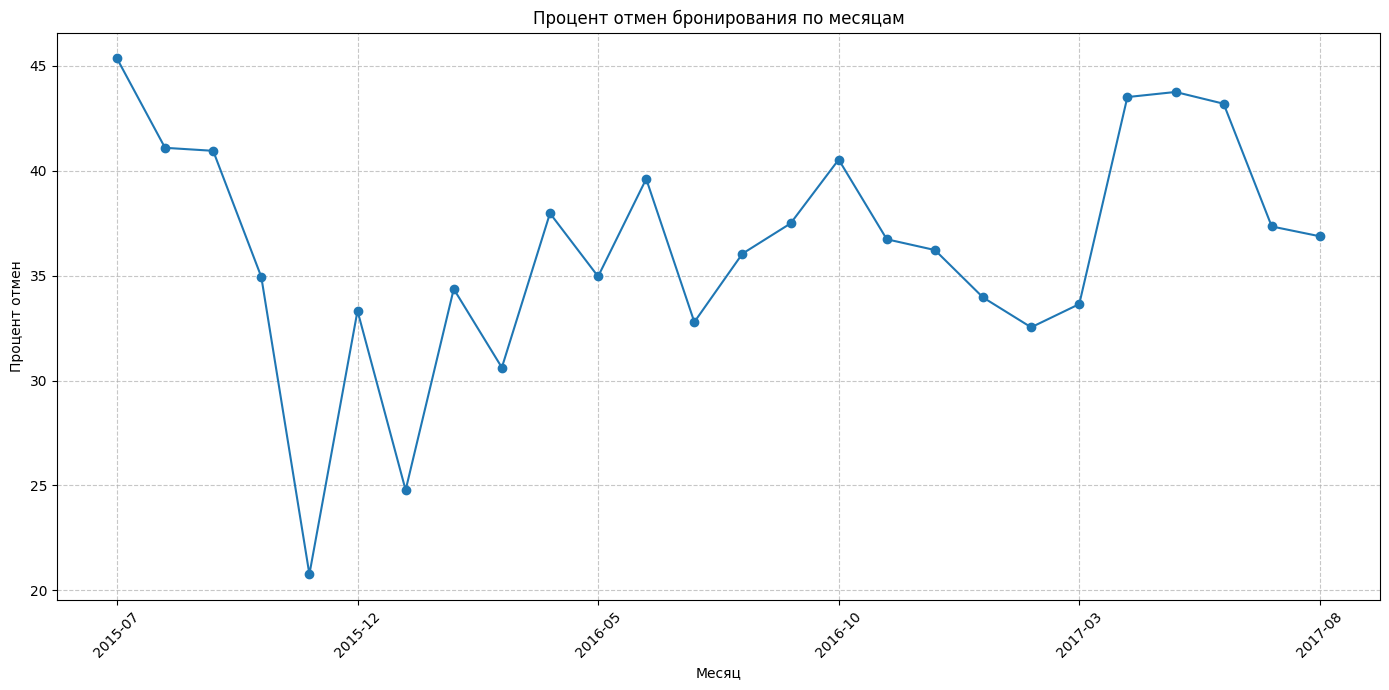

In [43]:
df['arrival_month'] = pd.to_datetime(df['arrival_date_year'].astype(str) + '-' +
                                     df['arrival_date_month'] + '-01')
monthly_cancellation = df.groupby(df['arrival_month'].dt.strftime('%Y-%m'))['is_canceled'].mean() * 100

plt.figure(figsize=(14, 7))
monthly_cancellation.plot(kind='line', marker='o')
plt.title('Процент отмен бронирования по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Процент отмен')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Анализ влияния категориальных признаков на отмену бронирования

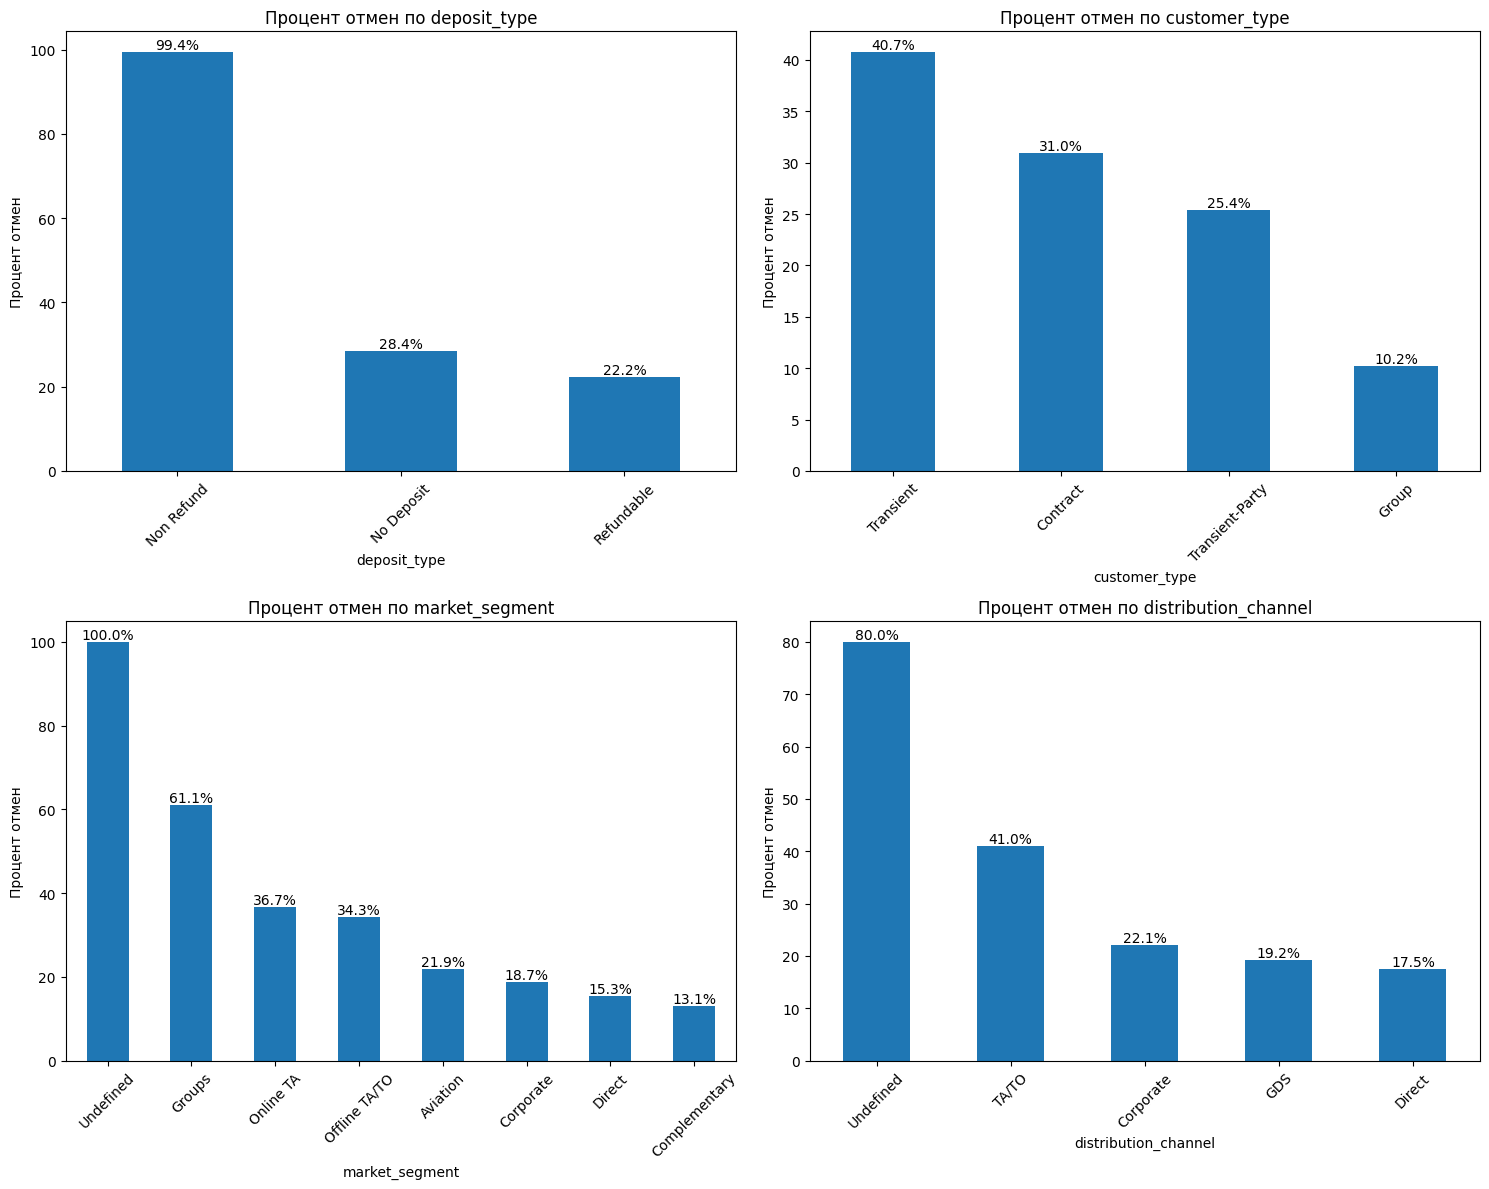

In [44]:
important_cat_features = ['deposit_type', 'customer_type', 'market_segment', 'distribution_channel']

plt.figure(figsize=(15, 12))
for i, feature in enumerate(important_cat_features):
    plt.subplot(2, 2, i+1)
    cancellation_by_feature = df.groupby(feature)[target_column].mean() * 100
    cancellation_by_feature = cancellation_by_feature.sort_values(ascending=False)
    ax = cancellation_by_feature.plot(kind='bar')
    plt.title(f'Процент отмен по {feature}')
    plt.xlabel(feature)
    plt.ylabel('Процент отмен')
    plt.xticks(rotation=45)

    for j, p in enumerate(ax.patches):
        ax.annotate(f"{p.get_height():.1f}%",
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'bottom')

plt.tight_layout()
plt.show()


Анализ корреляций между числовыми признаками

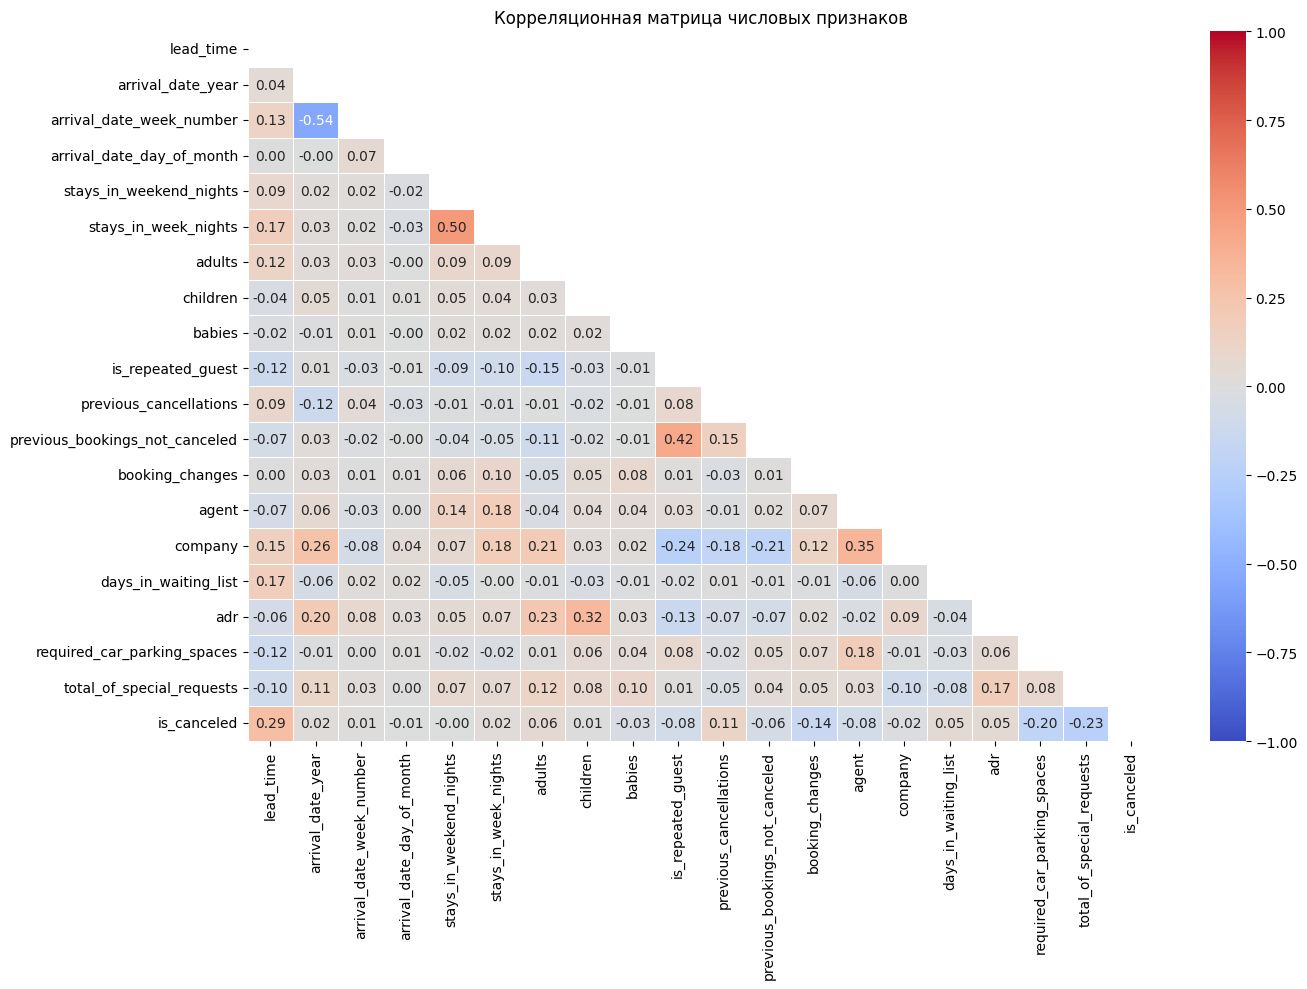

Топ-5 числовых признаков, наиболее коррелирующих с отменой бронирования:
is_canceled                    1.000000
lead_time                      0.293123
total_of_special_requests      0.234658
required_car_parking_spaces    0.195498
booking_changes                0.144381
previous_cancellations         0.110133
Name: is_canceled, dtype: float64


In [45]:
numerical_for_corr = numerical_cols.tolist() + [target_column]
plt.figure(figsize=(14, 10))
corr_matrix = df[numerical_for_corr].corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', cmap='coolwarm',
            linewidths=0.5, vmin=-1, vmax=1)
plt.title('Корреляционная матрица числовых признаков')
plt.tight_layout()
plt.show()

corr_with_target = corr_matrix[target_column].abs().sort_values(ascending=False)
print("Топ-5 числовых признаков, наиболее коррелирующих с отменой бронирования:")
print(corr_with_target.head(6))


Подготовка данных для моделирования

In [49]:
df_processed = df.copy()

for col in numerical_cols:
    if df_processed[col].isna().sum() > 0:
        df_processed[col].fillna(df_processed[col].median(), inplace=True)

for col in categorical_cols:
    if df_processed[col].isna().sum() > 0:
        df_processed[col].fillna(df_processed[col].mode()[0], inplace=True)

print("Оставшиеся пропущенные значения:")
print(df_processed.isna().sum().sum())

columns_to_drop = []
if 'reservation_status' in df_processed.columns:
    columns_to_drop.append('reservation_status')
if 'reservation_status_date' in df_processed.columns:
    columns_to_drop.append('reservation_status_date')
if 'arrival_month' in df_processed.columns:
    columns_to_drop.append('arrival_month')
if columns_to_drop:
    df_processed.drop(columns=columns_to_drop, axis=1, inplace=True)


Оставшиеся пропущенные значения:
0


<ipython-input-49-c3ed85622b47>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_processed[col].fillna(df_processed[col].median(), inplace=True)
<ipython-input-49-c3ed85622b47>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpla

Преобразование категориальных признаков

In [50]:
cat_features_to_encode = [col for col in categorical_cols if col in df_processed.columns]
print(f"Категориальные признаки для кодирования: {cat_features_to_encode}")

month_mapping = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
    'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12
}
if 'arrival_date_month' in df_processed.columns:
    df_processed['arrival_date_month'] = df_processed['arrival_date_month'].map(month_mapping)

# One-Hot Encoding для категориальных признаков
df_encoded = pd.get_dummies(df_processed, columns=cat_features_to_encode, drop_first=True)
print(f"Размер датасета после кодирования: {df_encoded.shape}")


Категориальные признаки для кодирования: ['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type']
Размер датасета после кодирования: (119390, 248)


Масштабирование числовых признаков

In [51]:
from sklearn.preprocessing import StandardScaler, QuantileTransformer

numerical_cols_to_scale = [col for col in df_encoded.columns
                          if col != target_column and df_encoded[col].dtype in ['int64', 'float64']]

high_range_cols = []
for col in numerical_cols_to_scale:
    if df_encoded[col].max() - df_encoded[col].min() > 100:
        high_range_cols.append(col)

if high_range_cols:
    qtransformer = QuantileTransformer(output_distribution='normal')
    df_encoded[high_range_cols] = qtransformer.fit_transform(df_encoded[high_range_cols])

other_num_cols = [col for col in numerical_cols_to_scale if col not in high_range_cols]
if other_num_cols:
    scaler = StandardScaler()
    df_encoded[other_num_cols] = scaler.fit_transform(df_encoded[other_num_cols])

print("Статистика после масштабирования:")
df_encoded[numerical_cols_to_scale[:5]].describe().transpose()[['mean', 'std', 'min', 'max']]


Статистика после масштабирования:


,mean,std,min,max
lead_time,-1.655895e-01,1.474947,-5.199338,5.199338
arrival_date_year,-8.406294e-14,1.000004,-1.634768,1.192195
arrival_date_week_number,-1.295034e-16,1.000004,-1.923191,1.898910
arrival_date_day_of_month,2.475800e-17,1.000004,-1.685297,1.731251
stays_in_weekend_nights,1.197430e-16,1.000004,-0.928890,18.097569


Разделение на обучающую и тестовую выборки

In [52]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop(target_column, axis=1)
y = df_encoded[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Размер обучающей выборки: {X_train.shape}")
print(f"Размер тестовой выборки: {X_test.shape}")
print(f"Распределение классов в обучающей выборке: {np.bincount(y_train)}")
print(f"Распределение классов в тестовой выборке: {np.bincount(y_test)}")


Размер обучающей выборки: (95512, 247)
Размер тестовой выборки: (23878, 247)
Распределение классов в обучающей выборке: [60133 35379]
Распределение классов в тестовой выборке: [15033  8845]


# Модели и обучение

## Построение модели XGBoost

In [53]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import time

xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.05]
}

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid,
                          cv=5, scoring='roc_auc', verbose=1)
start_time = time.time()
grid_search.fit(X_train, y_train)
end_time = time.time()

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("Обучение завершено за {:.2f} секунд".format(end_time - start_time))
print("Лучшая комбинация параметров:", grid_search.best_params_)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")


Fitting 5 folds for each of 27 candidates, totalling 135 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:15:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:15:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:15:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:15:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:15:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

Обучение завершено за 857.35 секунд
Лучшая комбинация параметров: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}
Accuracy: 0.8777
Precision: 0.8597
Recall: 0.8003
F1 Score: 0.8290
ROC AUC: 0.9517


Оценка качества модели

Отчет о классификации:
              precision    recall  f1-score   support

           0       0.89      0.92      0.90     15033
           1       0.86      0.80      0.83      8845

    accuracy                           0.88     23878
   macro avg       0.87      0.86      0.87     23878
weighted avg       0.88      0.88      0.88     23878



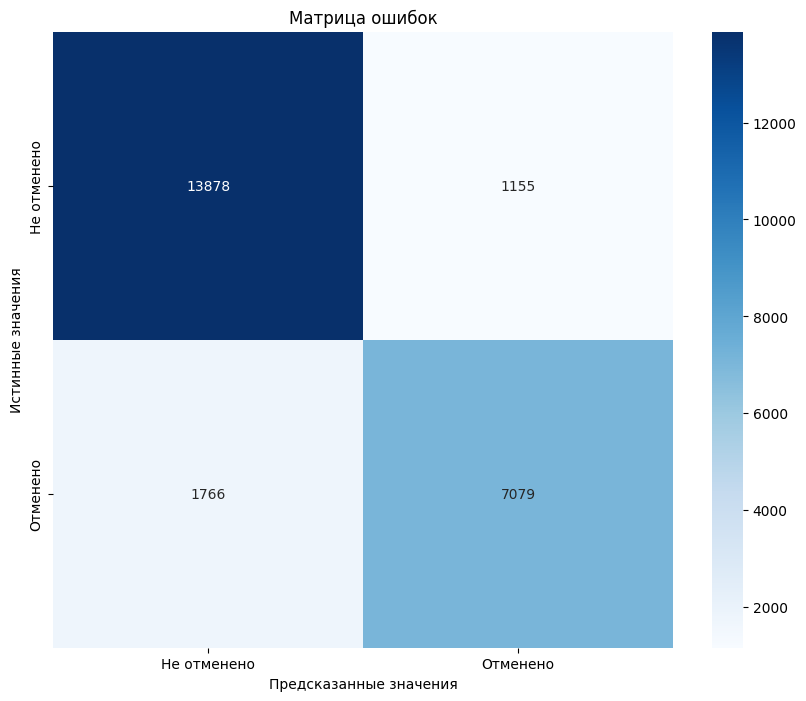

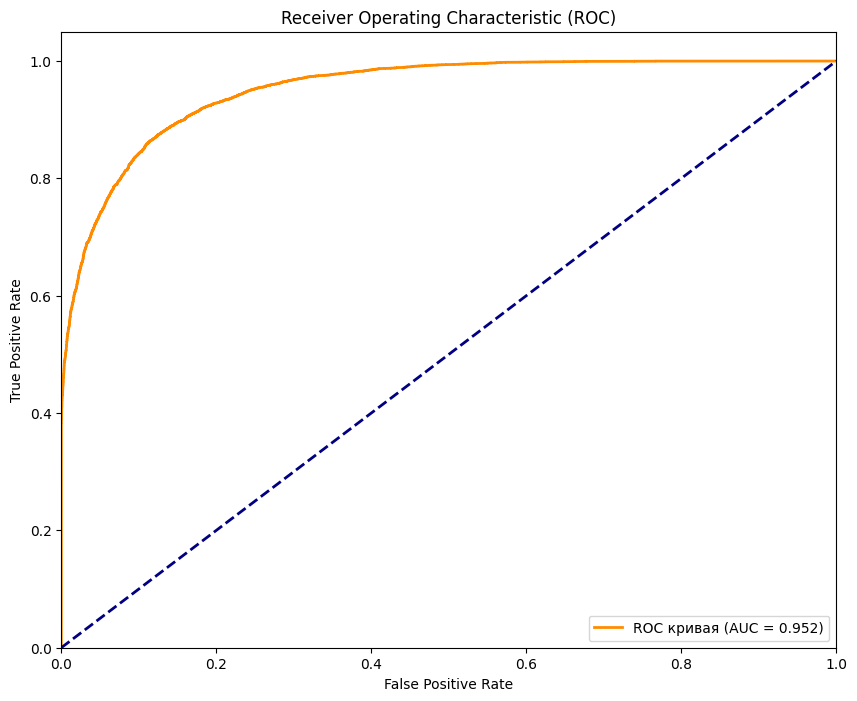

In [54]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

print("Отчет о классификации:")
print(classification_report(y_test, y_pred))

plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Не отменено', 'Отменено'],
            yticklabels=['Не отменено', 'Отменено'])
plt.title('Матрица ошибок')
plt.xlabel('Предсказанные значения')
plt.ylabel('Истинные значения')
plt.show()

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC кривая (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


Важность признаков по модели XGBoost

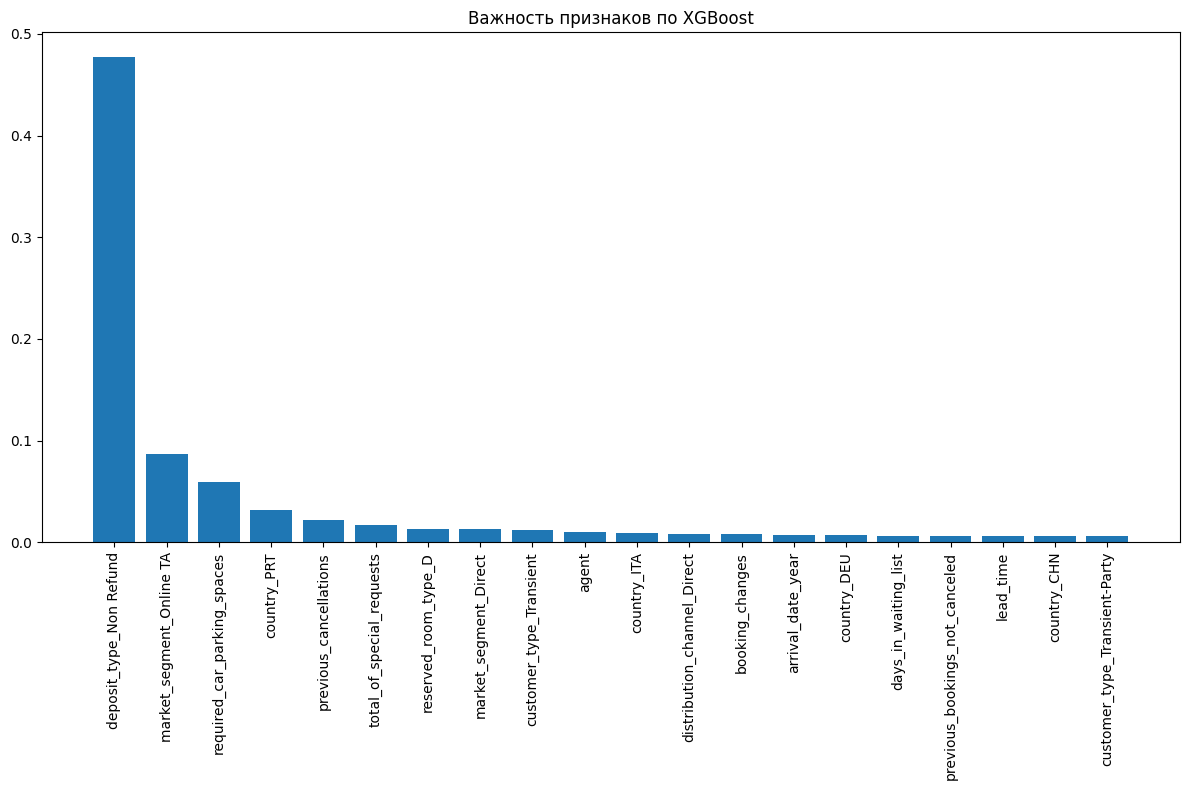

Топ-10 признаков по важности:
1. deposit_type_Non Refund: 0.4777
2. market_segment_Online TA: 0.0863
3. required_car_parking_spaces: 0.0590
4. country_PRT: 0.0316
5. previous_cancellations: 0.0214
6. total_of_special_requests: 0.0169
7. reserved_room_type_D: 0.0134
8. market_segment_Direct: 0.0130
9. customer_type_Transient: 0.0118
10. agent: 0.0099


In [55]:
importance = best_model.feature_importances_
indices = np.argsort(importance)[::-1]

plt.figure(figsize=(12, 8))
plt.title('Важность признаков по XGBoost')
plt.bar(range(20), importance[indices][:20])
plt.xticks(range(20), X.columns[indices][:20], rotation=90)
plt.tight_layout()
plt.show()

print("Топ-10 признаков по важности:")
for i in range(10):
    print(f"{i+1}. {X.columns[indices][i]}: {importance[indices][i]:.4f}")


## Интерпретация модели с помощью SHAP

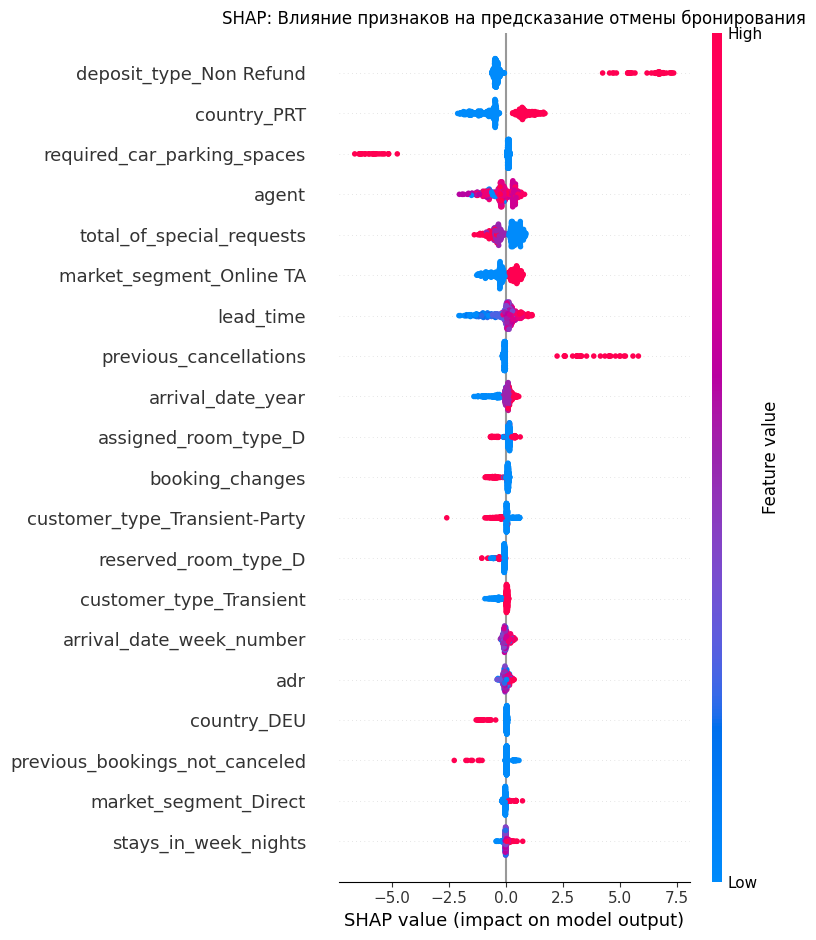

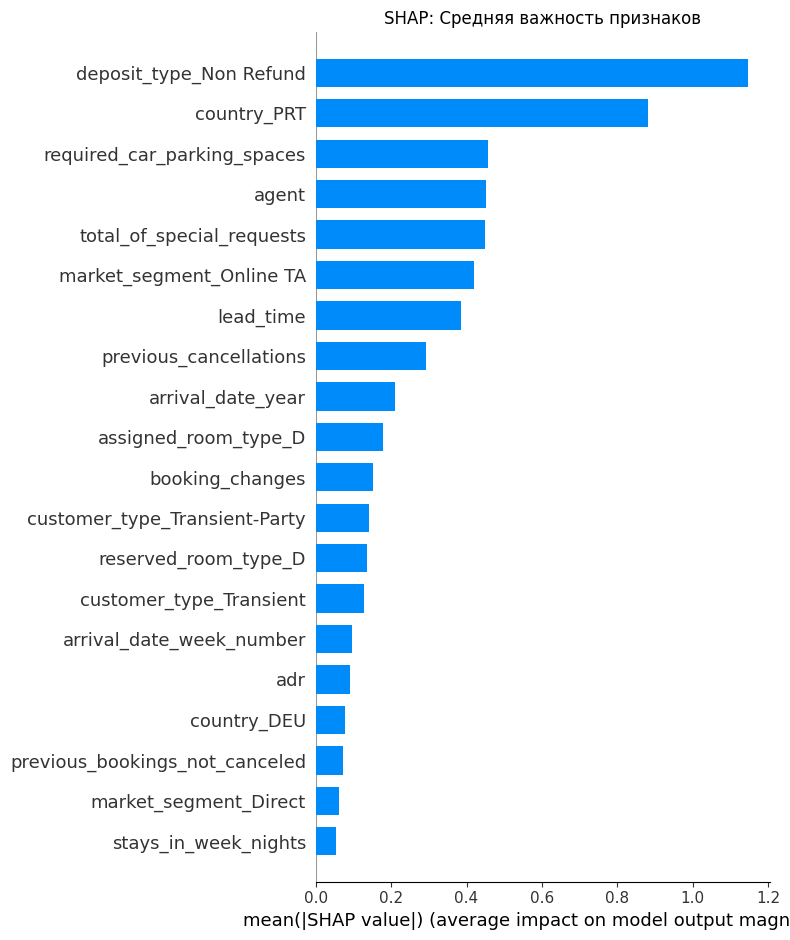

In [56]:
import shap

explainer = shap.Explainer(best_model)

sample_size = min(500, len(X_test))
X_test_sample = X_test.iloc[:sample_size]
shap_values = explainer(X_test_sample)

plt.figure(figsize=(14, 10))
shap.summary_plot(shap_values, X_test_sample, show=False)
plt.title('SHAP: Влияние признаков на предсказание отмены бронирования')
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 10))
shap.summary_plot(shap_values, X_test_sample, plot_type='bar', show=False)
plt.title('SHAP: Средняя важность признаков')
plt.tight_layout()
plt.show()


Объяснение для конкретных случаев
Выбираем два примера - один правильно предсказанный отмененный и один правильно предсказанный неотмененный

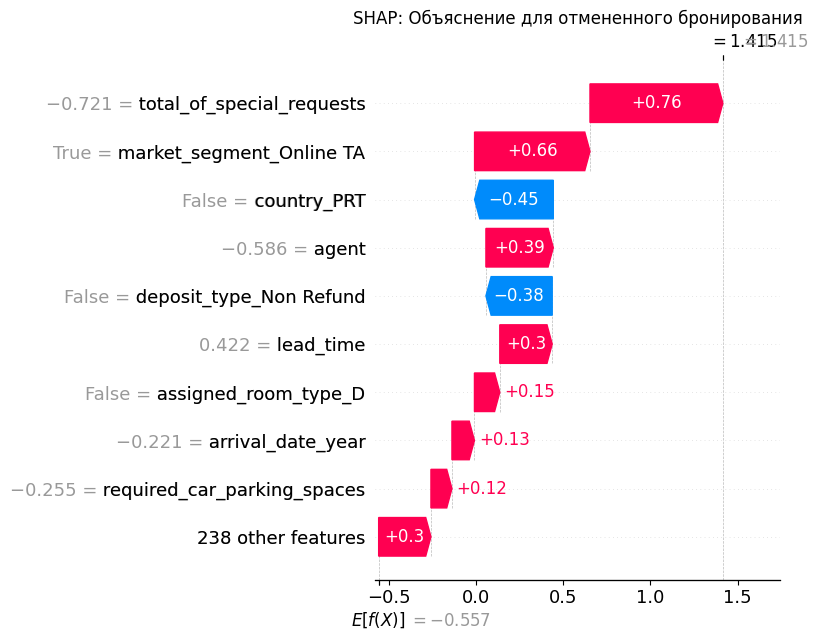

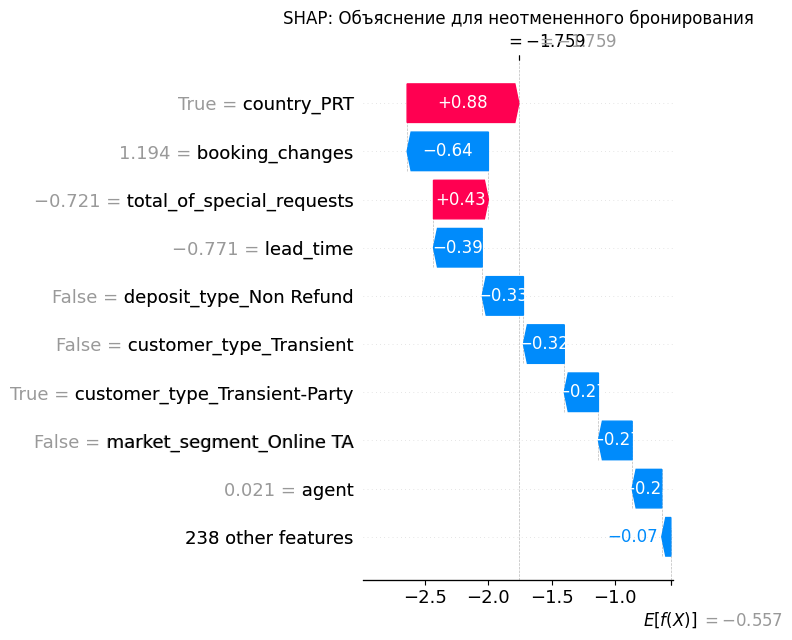

In [57]:
correct_canceled_idx = np.where((y_test == 1) & (y_pred == 1))[0]
correct_not_canceled_idx = np.where((y_test == 0) & (y_pred == 0))[0]

if len(correct_canceled_idx) > 0 and len(correct_not_canceled_idx) > 0:
    canceled_idx = correct_canceled_idx[0]

    plt.figure(figsize=(14, 8))
    shap.plots.waterfall(shap_values[canceled_idx], show=False)
    plt.title('SHAP: Объяснение для отмененного бронирования')
    plt.tight_layout()
    plt.show()
    not_canceled_idx = correct_not_canceled_idx[0]

    plt.figure(figsize=(14, 8))
    shap.plots.waterfall(shap_values[not_canceled_idx], show=False)
    plt.title('SHAP: Объяснение для неотмененного бронирования')
    plt.tight_layout()
    plt.show()
else:
    print("Не удалось найти примеры для анализа")


## Интерпретация модели с помощью Lime

In [58]:
!pip install lime

import lime
import lime.lime_tabular


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=a8ac1c9e73393f8bd0e758f676aaae186855ad49c38bf25e3a97b6d6b30fd242
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


<Figure size 1200x800 with 0 Axes>

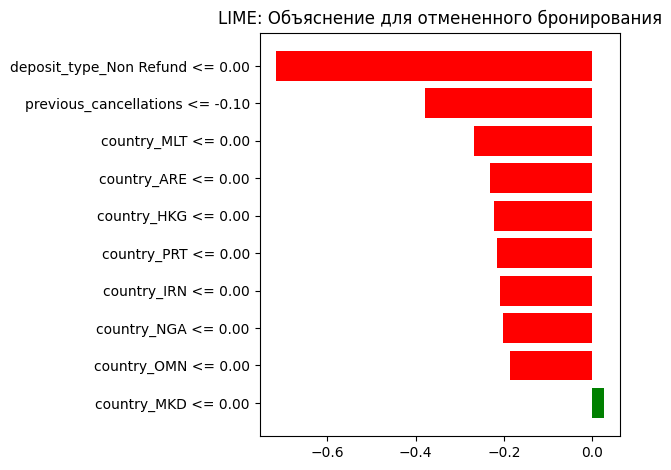

<Figure size 1200x800 with 0 Axes>

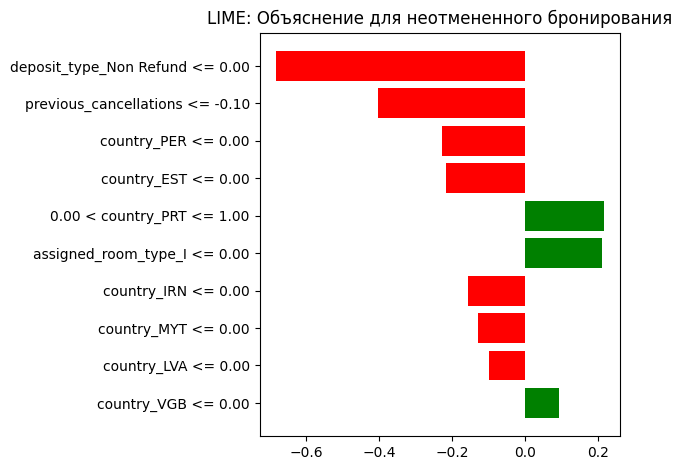

In [59]:
X_train_np = X_train.values
X_test_np = X_test.values

lime_explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train_np,
    feature_names=X_train.columns.tolist(),
    class_names=['не отменено', 'отменено'],
    mode='classification'
)

if 'canceled_idx' in locals() and 'not_canceled_idx' in locals():
    exp_canceled = lime_explainer.explain_instance(
        X_test_np[canceled_idx],
        best_model.predict_proba,
        num_features=10
    )
    plt.figure(figsize=(12, 8))
    exp_canceled.as_pyplot_figure()
    plt.title('LIME: Объяснение для отмененного бронирования')
    plt.tight_layout()
    plt.show()
    exp_not_canceled = lime_explainer.explain_instance(
        X_test_np[not_canceled_idx],
        best_model.predict_proba,
        num_features=10
    )

    plt.figure(figsize=(12, 8))
    exp_not_canceled.as_pyplot_figure()
    plt.title('LIME: Объяснение для неотмененного бронирования')
    plt.tight_layout()
    plt.show()
else:
    random_idx = np.random.randint(0, len(X_test))
    exp = lime_explainer.explain_instance(
        X_test_np[random_idx],
        best_model.predict_proba,
        num_features=10
    )

    plt.figure(figsize=(12, 8))
    exp.as_pyplot_figure()
    plt.title('LIME: Объяснение для случайного бронирования')
    plt.tight_layout()
    plt.show()


Анализ трудно классифицируемых случаев

Найдено 1036 случаев с вероятностью около 0.5


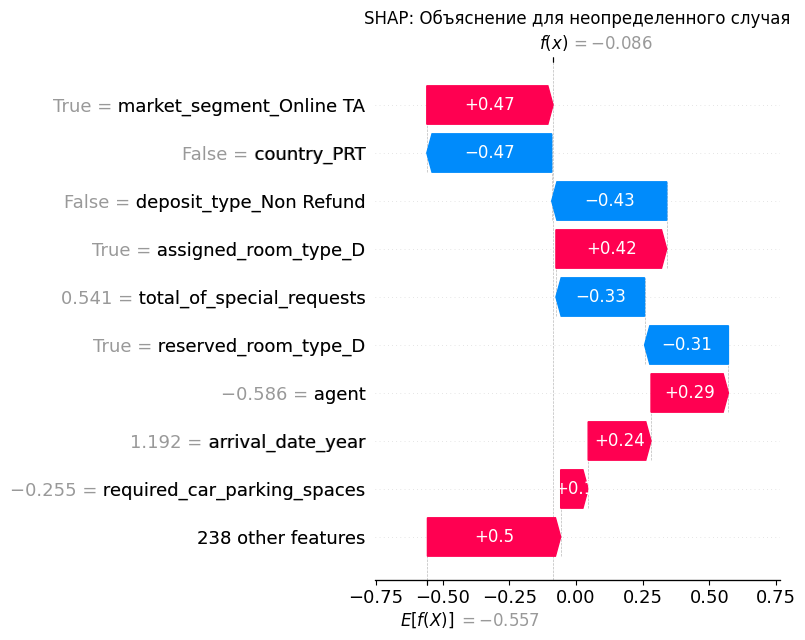

<Figure size 1200x800 with 0 Axes>

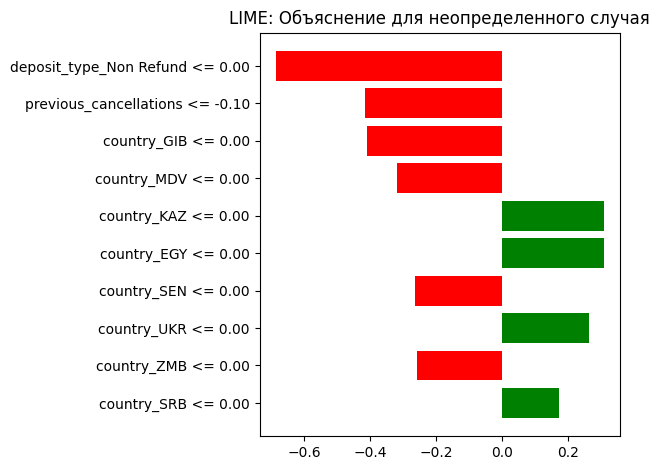

Реальное значение: отменено
Предсказанная вероятность отмены: 0.4786


In [60]:
threshold = 0.5
close_to_threshold = np.where(np.abs(y_pred_proba - threshold) < 0.05)[0]

if len(close_to_threshold) > 0:
    print(f"Найдено {len(close_to_threshold)} случаев с вероятностью около 0.5")
    uncertain_idx = close_to_threshold[0]

    # SHAP
    plt.figure(figsize=(14, 8))
    shap.plots.waterfall(shap_values[uncertain_idx], show=False)
    plt.title('SHAP: Объяснение для неопределенного случая')
    plt.tight_layout()
    plt.show()

    # LIME
    exp_uncertain = lime_explainer.explain_instance(
        X_test_np[uncertain_idx],
        best_model.predict_proba,
        num_features=10
    )

    plt.figure(figsize=(12, 8))
    exp_uncertain.as_pyplot_figure()
    plt.title('LIME: Объяснение для неопределенного случая')
    plt.tight_layout()
    plt.show()

    print(f"Реальное значение: {'отменено' if y_test.iloc[uncertain_idx] == 1 else 'не отменено'}")
    print(f"Предсказанная вероятность отмены: {y_pred_proba[uncertain_idx]:.4f}")
else:
    print("Не найдено случаев с вероятностью около 0.5")


Прогнозирование на новых данных

Создаем новый образец данных для прогнозирования.

два сценария: один с высоким риском отмены, другой с низким


In [61]:
high_risk_data = {}
for col in X.columns:
    high_risk_data[col] = 0

high_risk_data.update({
    'lead_time': 2,
    'stays_in_weekend_nights': 0,
    'stays_in_week_nights': 2,
    'adults': 2,
    'children': 0,
    'is_repeated_guest': 0,
    'previous_cancellations': 1,
    'previous_bookings_not_canceled': 0,
    'booking_changes': 2,
    'days_in_waiting_list': 1,
    'required_car_parking_spaces': 0,
    'total_of_special_requests': 0,
    'deposit_type_Non Refund': 0,  # не возвращаемый депозит
    'customer_type_Transient': 1,  # разовый гость
    'market_segment_Online TA': 1  # бронирование через онлайн-агентство
})

# Низкий риск отмены (короткое время ожидания, с детьми, мало изменений)
low_risk_data = {}
for col in X.columns:
    low_risk_data[col] = 0

low_risk_data.update({
    'lead_time': -0.5,
    'stays_in_weekend_nights': 2,
    'stays_in_week_nights': 3,
    'adults': 2,
    'children': 1,
    'is_repeated_guest': 1,
    'previous_cancellations': 0,
    'previous_bookings_not_canceled': 2,
    'booking_changes': 0,
    'days_in_waiting_list': 0,
    'required_car_parking_spaces': 1,
    'total_of_special_requests': 2,
    'deposit_type_Non Refund': 1,  # не возвращаемый депозит
    'customer_type_Transient': 0,  # не разовый гость
    'market_segment_Direct': 1  # бронирование напрямую
})

high_risk_df = pd.DataFrame([high_risk_data])
low_risk_df = pd.DataFrame([low_risk_data])

high_risk_prob = best_model.predict_proba(high_risk_df)[0, 1]
low_risk_prob = best_model.predict_proba(low_risk_df)[0, 1]

print(f"Прогноз для сценария с высоким риском отмены:")
print(f"Вероятность отмены: {high_risk_prob:.4f}")
print(f"Прогноз: {'Вероятно будет отменено' if high_risk_prob > 0.5 else 'Вероятно не будет отменено'}")
print("\nПрогноз для сценария с низким риском отмены:")
print(f"Вероятность отмены: {low_risk_prob:.4f}")
print(f"Прогноз: {'Вероятно будет отменено' if low_risk_prob > 0.5 else 'Вероятно не будет отменено'}")


Прогноз для сценария с высоким риском отмены:
Вероятность отмены: 0.5981
Прогноз: Вероятно будет отменено

Прогноз для сценария с низким риском отмены:
Вероятность отмены: 0.8620
Прогноз: Вероятно будет отменено


Объяснение прогнозов для новых данных с помощью LIME

<Figure size 1200x800 with 0 Axes>

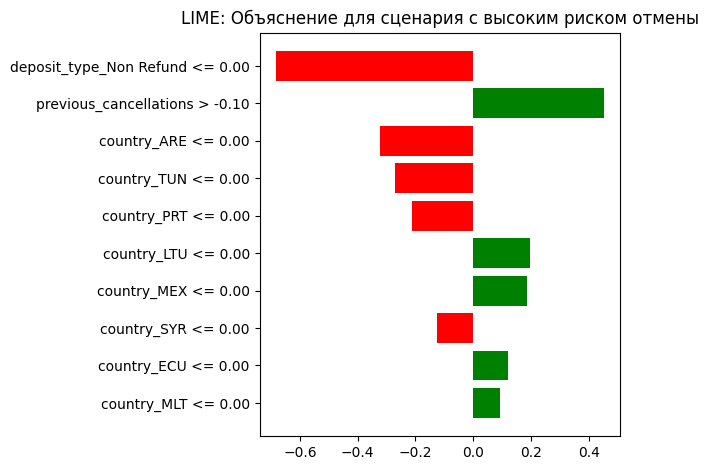

<Figure size 1200x800 with 0 Axes>

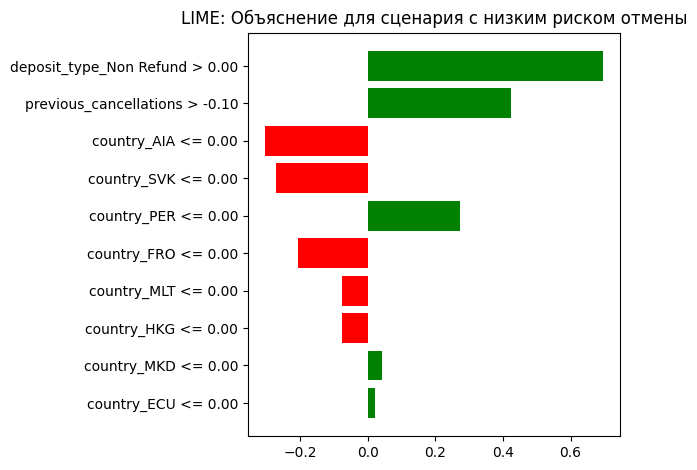

In [62]:
exp_high_risk = lime_explainer.explain_instance(
    high_risk_df.iloc[0].values,
    best_model.predict_proba,
    num_features=10
)

plt.figure(figsize=(12, 8))
exp_high_risk.as_pyplot_figure()
plt.title('LIME: Объяснение для сценария с высоким риском отмены')
plt.tight_layout()
plt.show()

exp_low_risk = lime_explainer.explain_instance(
    low_risk_df.iloc[0].values,
    best_model.predict_proba,
    num_features=10
)

plt.figure(figsize=(12, 8))
exp_low_risk.as_pyplot_figure()
plt.title('LIME: Объяснение для сценария с низким риском отмены')
plt.tight_layout()
plt.show()


# Вывод
В ходе выполнения работы был проанализирован датасет из 119390 бронирований отелей с 33 признаками и выполнена интерпретация модели с помощью методов SHAP и Lime. Основные результаты:
1. 37% бронирований были отменены клиентами.
2. Городские отели имеют более высокий процент отмен (41.7%) по сравнению с курортными отелями (27.8%).
4. Время ожидания (lead_time) является одним из ключевых факторов отмены: чем дольше период между бронированием и заездом, тем выше вероятность отмены.
5. Построенная модель имеет точность 0.88 и ROC AUC 0.95, что позволяет эффективно прогнозировать вероятность отмены бронирования.
6. Ключевые факторы, влияющие на вероятность отмены бронирования:
   - deposit_type_Non Refund - **Тип депозита "без возврата"**
   - market_segment_Online TA - **Бронирование через тур-агенство**
   - required_car_parking_spaces - **Количество парковочных мест**
   - country_PRT - **Страна происхождения гостя** (PRT - Португалия)
   - previous_cancellations - **Количество предыдущих отмен бронирования клиента**